<h1> Wide and deep network 

Wide and deep network to capture both simple and deep patterns. It connects all or part of the inputs directly to the output layer. This architecture makes it possible for the neural network to learn both deep patterns (using the deep path) and simple rules (through the short path). In contrast, a regular MLP forces all the data to flow through the full stack of layers.Thus, simple patterns in the data may end up being distorted by this sequence of transformations. 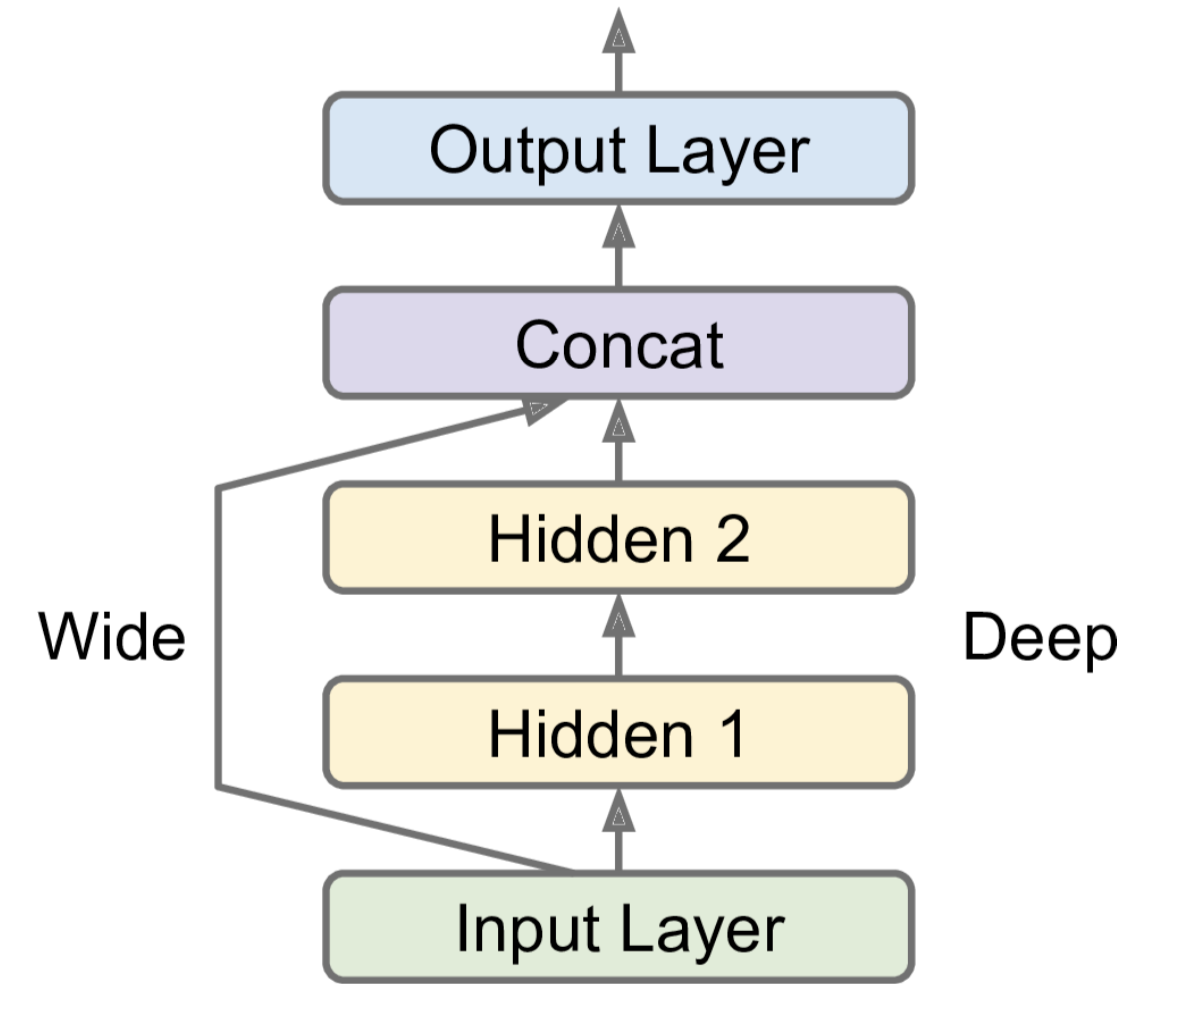

In [1]:
from tensorflow import keras 
import tensorflow as tf
from sklearn.datasets import fetch_california_housing 
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler


In [2]:
housing = fetch_california_housing()
X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

In [7]:
input_ = keras.layers.Input(shape=X_train.shape[1:]) # specification on what input will the model get
hidden1 = keras.layers.Dense(30,activation="relu")(input_)
hidden2 = keras.layers.Dense(30,activation="relu")(hidden1)
concat = keras.layers.Concatenate()([input_,hidden2])
output = keras.layers.Dense(1)(concat) # no activation function since it is a regression problem.
model = keras.Model(inputs=[input_],outputs=[output])

If you want to use different input for the deep path and shallow path. Then you can create separate input for each. 


In [8]:
input_A = keras.layers.Input(shape=[5], name="wide_input")
input_B = keras.layers.Input(shape=[6], name="deep_input")
hidden1 = keras.layers.Dense(30, activation="relu")(input_B)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.concatenate([input_A, hidden2])
output = keras.layers.Dense(1, name="output")(concat)
model = keras.Model(inputs=[input_A, input_B], outputs=[output])

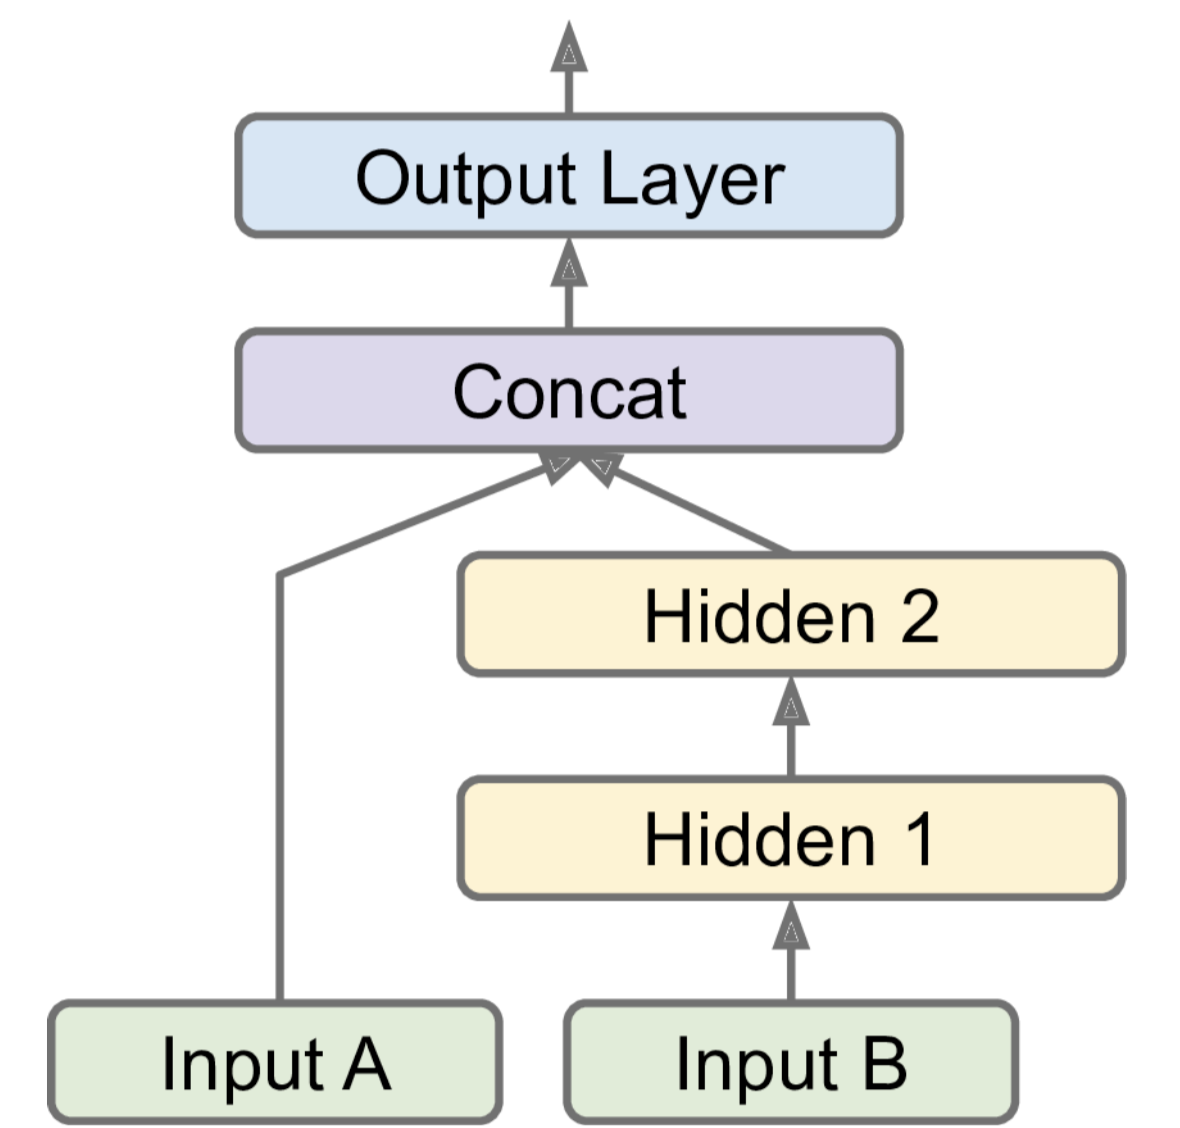

In [9]:
model.compile(loss="mse", optimizer=keras.optimizers.SGD(lr=1e-3))

In [13]:
# selecting separate features for the input.

In [11]:
X_train[0,:5]

array([-0.62929168, -0.5245525 , -0.5100107 ,  0.0580212 ,  0.21727492])

In [12]:
X_train[0,2:]

array([-0.5100107 ,  0.0580212 ,  0.21727492, -0.01222078, -0.70254726,
        0.65671276])

In [14]:
X_train_A, X_train_B = X_train[:, :5], X_train[:, 2:]
X_valid_A, X_valid_B = X_valid[:, :5], X_valid[:, 2:]
X_test_A, X_test_B = X_test[:, :5], X_test[:, 2:]
X_new_A, X_new_B = X_test_A[:3], X_test_B[:3]

In [16]:
history = model.fit((X_train_A,X_train_B),y_train,epochs=20,validation_data=((X_valid_A,X_valid_B),y_valid))

Train on 11610 samples, validate on 3870 samples
Epoch 1/20
11610/11610 [==============================] - 1s 52us/sample - loss: 2.3389 - val_loss: 0.8779
Epoch 2/20
11610/11610 [==============================] - 0s 31us/sample - loss: 0.8366 - val_loss: 0.7113
Epoch 3/20
11610/11610 [==============================] - 0s 33us/sample - loss: 0.7259 - val_loss: 0.6475
Epoch 4/20
11610/11610 [==============================] - 0s 32us/sample - loss: 0.6720 - val_loss: 0.6095
Epoch 5/20
11610/11610 [==============================] - 0s 32us/sample - loss: 0.6357 - val_loss: 0.5809
Epoch 6/20
11610/11610 [==============================] - 0s 33us/sample - loss: 0.6070 - val_loss: 0.5569
Epoch 7/20
11610/11610 [==============================] - 0s 32us/sample - loss: 0.5831 - val_loss: 0.5385
Epoch 8/20
11610/11610 [==============================] - 0s 35us/sample - loss: 0.5660 - val_loss: 0.5232
Epoch 9/20
11610/11610 [==============================] - 0s 33us/sample - loss: 0.5494 - val_l

In [17]:
mse_test = model.evaluate((X_test_A,X_test_B), y_test)

5160/5160 [==============================] - 0s 19us/sample - loss: 0.4504


In [18]:
y_pred = model.predict((X_new_A, X_new_B))

In [19]:
y_pred

array([[0.8449054],
       [1.5288916],
       [2.0351138]], dtype=float32)

<h4>Having multiple outputs

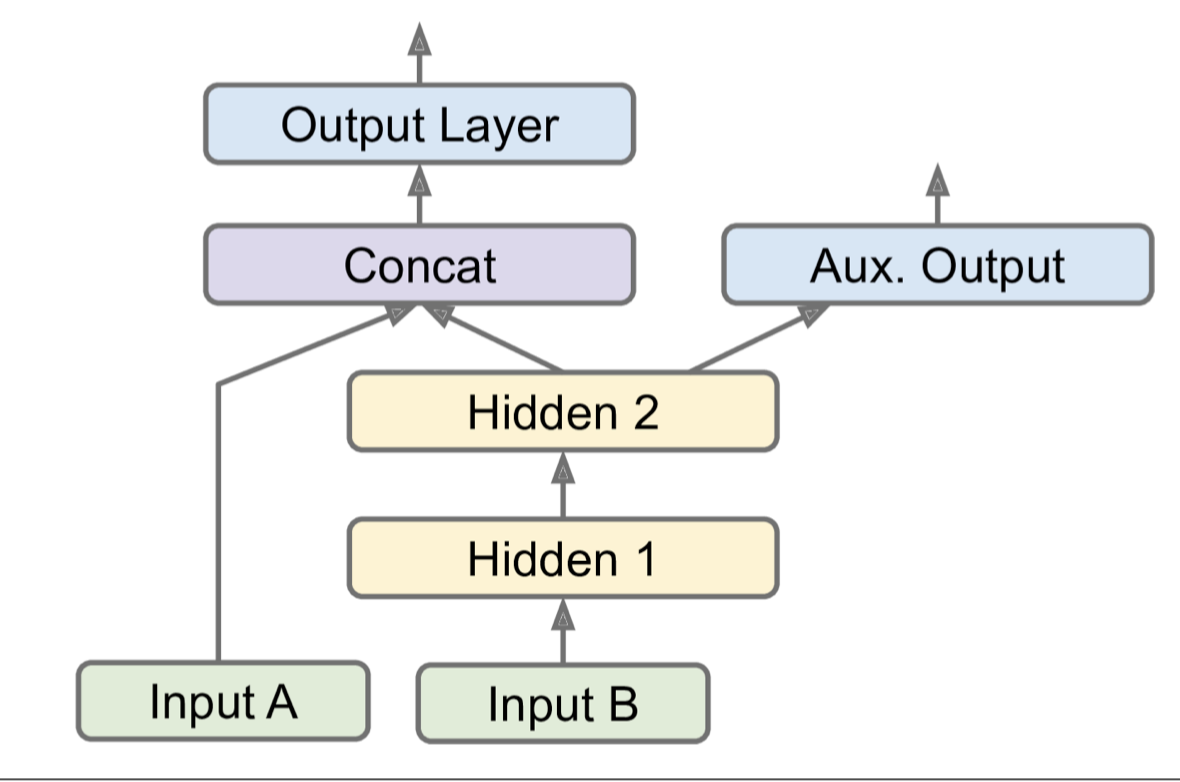

In [20]:
# Same as above, up to the main output layer
output = keras.layers.Dense(1, name="main_output")(concat)
aux_output = keras.layers.Dense(1, name="aux_output")(hidden2)
model = keras.Model(inputs=[input_A, input_B], outputs=[output, aux_output])

In [21]:
# We care much more about the main output than about the auxiliary output 
model.compile(loss=["mse","mse"], loss_weights=[0.9,0.1], optimizer="sgd") 

In [22]:
# Predicting the same thing. 
history = model.fit([X_train_A, X_train_B], [y_train, y_train], epochs=20,validation_data=([X_valid_A, X_valid_B], [y_valid, y_valid]))

Train on 11610 samples, validate on 3870 samples
Epoch 1/20
11610/11610 [==============================] - 1s 69us/sample - loss: 0.9872 - main_output_loss: 0.8333 - aux_output_loss: 2.3682 - val_loss: 0.7228 - val_main_output_loss: 0.6789 - val_aux_output_loss: 1.1182
Epoch 2/20
11610/11610 [==============================] - 0s 38us/sample - loss: 0.6124 - main_output_loss: 0.5555 - aux_output_loss: 1.1251 - val_loss: 0.5071 - val_main_output_loss: 0.4550 - val_aux_output_loss: 0.9752
Epoch 3/20
11610/11610 [==============================] - 0s 38us/sample - loss: 0.5247 - main_output_loss: 0.4757 - aux_output_loss: 0.9650 - val_loss: 0.4822 - val_main_output_loss: 0.4381 - val_aux_output_loss: 0.8785
Epoch 4/20
11610/11610 [==============================] - 0s 39us/sample - loss: 0.5103 - main_output_loss: 0.4698 - aux_output_loss: 0.8738 - val_loss: 0.4638 - val_main_output_loss: 0.4266 - val_aux_output_loss: 0.7982
Epoch 5/20
11610/11610 [==============================] - 0s 38us/s

In [23]:
total_loss, main_loss, aux_loss = model.evaluate([X_test_A, X_test_B], [y_test, y_test])

5160/5160 [==============================] - 0s 21us/sample - loss: 0.3499 - main_output_loss: 0.3370 - aux_output_loss: 0.4970


In [24]:
y_pred_main, y_pred_aux = model.predict([X_new_A, X_new_B])

In [25]:
y_pred_main

array([[0.8332337],
       [1.240071 ],
       [1.6814854]], dtype=float32)

In [26]:
y_pred_aux

array([[1.1340735],
       [1.4893603],
       [1.9362979]], dtype=float32)